# Bienvenidos al taller:
# Programación en paralelo con CUDA

### Ing. César Castrejón Peralta
### castrejonp2021@cic.ipn.mx

### Centro de Investigación en Computación
---
### Mini Workshop on High Performance Computing in Science and Engineering
### Noviembre 2022


# Antes de comenzar...

Para facilitar el trabajo en este taller se trabajarán los ejercicios en Colab, pero es importante recordar que no es un entorno diseñado para esto.

Es necesario instalar un paquete de GitHub y habilitarlo para que la plataforma sea capaz de compilar códigos en CUDA C/C++.

Además, se debe habilitar la ejecución en GPU, para hacerlo, debemos seguir los siguientes pasos:
1. Ir "Entorno de ejecución"
2. Cambiar tipo de entorno de ejecución
3. Usar GPU

---

In [6]:
#@title Versión de CUDA en Colab

!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:49:14_PDT_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0


In [5]:
#@title *Opcional (si se requiere alguna versión de CUDA específica)* 

!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

!wget --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
# Se instala CUDA kit
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
# De ser necesario, se debe modificar la versión de CUDA
!apt-get install cuda-11-7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [8]:
#@title *NECESARIO* Configuración en Colab

!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-96godz7c
  Running command git clone -q https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-96godz7c
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4304 sha256=4a96f727ee1098f5c6017d917475ad338aba65d6581ee4886ea484a5ae904d79
  Stored in directory: /tmp/pip-ephem-wheel-cache-ylzgmwe7/wheels/ca/33/8d/3c86eb85e97d2b6169d95c6e8f2c297fdec60db6e84cb56f5e
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out


In [11]:
#@title Prueba básica en C

%%cu
#include <stdio.h>
int main()
{
    printf( "\t\t\t\t\t\t Welcome to\n"
            "\t\t\t\tMini Workshop on High Performance Computing\n"
            "\t\t\t\t\t in Science and Engineering")
    return 0;
}

/tmp/tmp_8uq7e6c/69a8c4e3-ddd6-46b7-98d2-daf52ccd26cc.cu(7): error: expected a ";"

1 error detected in the compilation of "/tmp/tmp_8uq7e6c/69a8c4e3-ddd6-46b7-98d2-daf52ccd26cc.cu".



Si el código anterior no arroja errores, podemos continuar.

Para compilar cualquier código se debe incluir **%%cu** como encabezado, de lo contrario, Colab no reconocerá la sintáxis de C.

---

## Configuración ideal

Para instalar CUDA en una computadora es necesario contar con una GPU compatible (revisar compatibilidad en https://developer.nvidia.com/cuda-gpus) y un compilador de C. En el caso de Windows se puede seguir [este tutorial](https://www.freecodecamp.org/news/how-to-install-c-and-cpp-compiler-on-windows/) para instalarlo, o descargar algún editor como [CLion](https://www.jetbrains.com/clion/learn/)


Para ambos casos, será necesario descargar e instalar el siguiente paquete: https://developer.nvidia.com/cuda-toolkit

###Notas
- Para verificar que la instalación es correcta, se puede buscar la versión instalada como *nvcc --version* desde la terminal.
- nvcc es el compilador al que llamaremos para trabajar con CUDA. El comando es similar a gcc o g++: *nvcc -o nombre nombra.cu*)
- Para versiones recientes de GCC, CUDA arrojará un error de compatibilidad. Si es el caso, se puede agregar la bandera *-allow-unsupported-compiler*

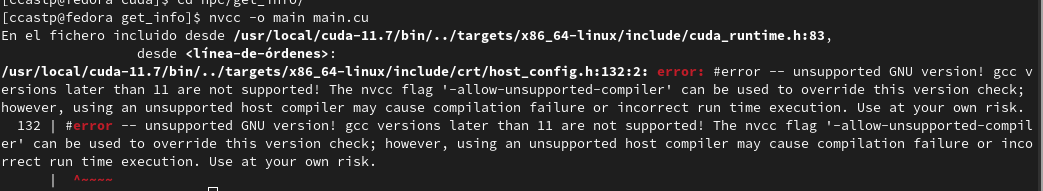

# Introducción

Durante el taller se mencionará la estructura de una GPU y algunos comandos básicos de la programación en CUDA, al finalizar, se mencionarán algunos puntos importantes a considerar antes de comenzar proyectos en programación paralela (que pueden aplciarse para cualquier caso).

Primero, mencionemos brevemente como funciona el procesamiento secuencial, concurrente y paralelo:

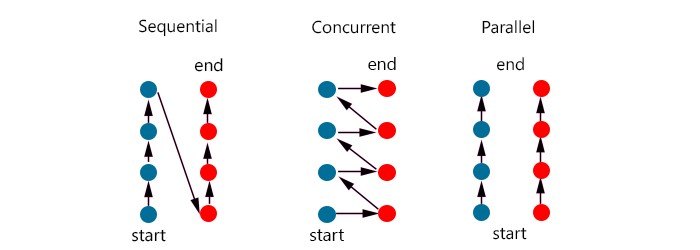

Normalmente, los procesadores realizan operaciones secuenciales y concurrentes.

En el cómputo de alto rendimiento existen tres entornos que permiten la programación en paralelo: *openMP*, *openACC*, *MPI* y *CUDA*. Los primeros tres son de uso libre y no requieren hardware especial. CUDA es una extensión especializada en el uso de GPU de NVIDIA.

*OpenCL también permite programación en GPU, además de otros disposivitos de cálculo compatibles como FPGA*

La estructura básica de un código en CUDA C/C++ se compone de tres elementos:
- CPU (que se conoce como *host*), que se encarga de leer y preparar los datos de entrada.
- La función que ejecutará la GPU (*kernel*) y de enviar y recibir los resultados.
- GPU (*device*) sólo se encarga de procesar (en paralelo) la infomación que recibe del host, y de regresar los resultados.

Los términos *host* y *device* ya que son parte de la sintáxis de CUDA, y en algunos casos, la diferencia entre un comando u otro es la aparación o el orden de estos.

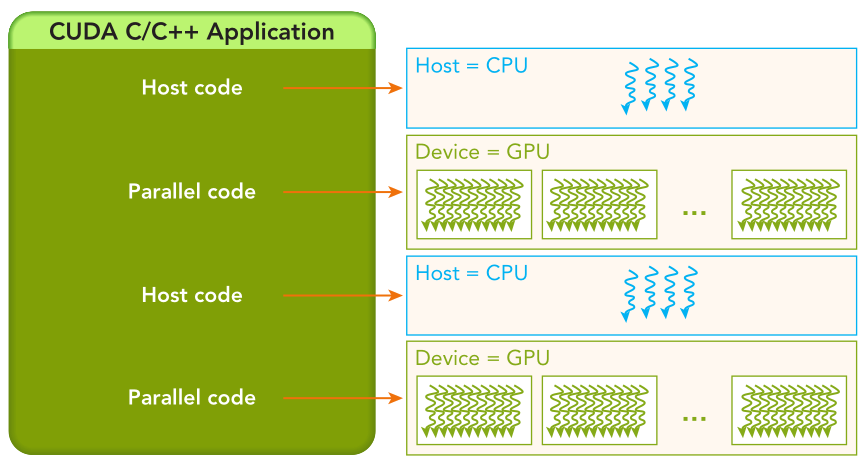

En resumen:
1. Se envía la información desde el CPU (*host*) hacia la memoria de la GPU (*device*).
2. Se ejecutan las funciones a realizar dentro de la GPU (*kernel*).
3. Se copia la información de la memoria de el *device* hacia el *host*.

---

Para trabajar en CUDA, la GPU se divide de la siguiente forma:
- Threads (Hilos de procesamiento)
- Blocks (Bloques de hilos)
- Grid (Grupos de bloques)

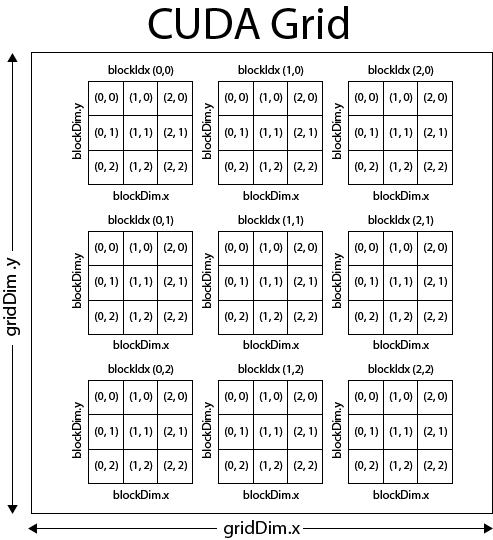

Las coordenadas de los tres niveles se pueden utilizar como índices en arreglos o como condicionales para secciones de código del kernel.

*(Se pueden generar bloques y grids hasta en 3 dimensiones)*

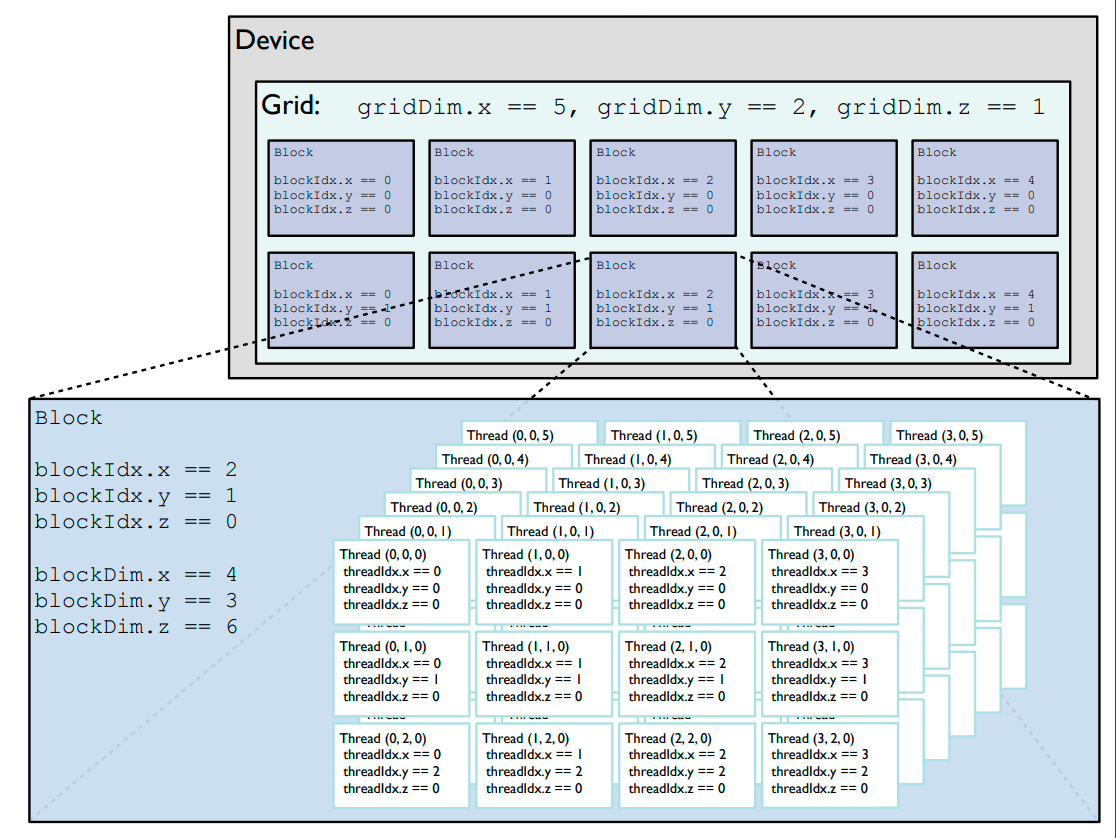

In [ ]:
#@title Hello World
%%cu

#include <stdio.h>

__global__ void helloWorld (void)
{
  int tthreadx = blockDim.x;
  int tthready = blockDim.y;
  int tthreadz = blockDim.z;
  int gridx    = gridDim.x;
  int gridy    = gridDim.y;
  int gridz    = gridDim.z;
 
  int threadx  = threadIdx.x;
  int thready  = threadIdx.y;
  int threadz  = threadIdx.z;
  int blockx   = blockIdx.x;
  int blocky   = blockIdx.y;
  int blockz   = blockIdx.z;
  
  printf("Hello World from GPU, thread (%d, %d, %d), bloque (%d, %d, %d)\n",
         threadx, thready, threadz, blockx, blocky, blockz);
   
  if (gridz == 1)
  {
    printf( "\nEl tamaño del grid es (%d, %d, %d)"
            "\nEl tamaño de cada bloque es (%d, %d, %d) (# thread(s))\n",
            gridx, gridy, gridz, tthreadx, tthready, tthreadz);
  }
}

int main()
{
  dim3 nBlocks(2);
  dim3 threadsPerBlock(2);
 
  printf("Hello from CPU\n")
  helloWorld <<<nBlocks, threadsPerBlock>>>();
 
  cudaDeviceSynchronize();
  cudaDeviceReset();
 
  return 0;
}

- *\_\_global__* indica al compilador que la función se debe ejecutar en la GPU, es decir, es el *kernel*.
- *nombre_funcion <<<numero_bloques, threads_p_bloque>>> (param_entrada)* es la estructura básica para comenzar la ejecución del kernel.
<ul>
- *numero_bloques* Se pueden tener máximo $65535$ grids, divididos en 3 dimensiones. Cada dimensión puede ser de máximo $65535$.
- *threads_p_bloque* Se pueden tener máximo $1024$ threads, divididos en 3 dimensiones. EL tamaño máximo de cada dimensión es $1024$ en x, $1024$ en y, $64$ en z
</ul>
- *cudaDeviceSynchronize()* CUDA funciona de forma asincrona, es decir, cada thread devuelve el resultado de su operación cuando termina, sin esperar al resto de resultados. Este comando espera a que terminen todos los procesos de la llamada al kernel. (Más adelante se verá un comando similar que funciona dentro de la función)
- *cudaDeviceReset()* elimina (y reinicia) **toda** la información asociada al kernel. Existe un comando similar a *free()*, que sólo libera el espacio en memoria de cada variable. **Similar a la programación clásica en C/C++, es importante siempre liberar la memoria**.
- Los comandos con el término *Idx.#* regresan el nombre (o clave) del elemento actual, el término *Dim.#* regresan la cantidad en el eje indicado (esto es válido para todos los módulos de programación en paralelo, como OpenMP, MPI).

In [ ]:
#@title Getting information
%%cu

#include <stdio.h>

int main()
{
  cudaDeviceProp prop;
  int count;

  cudaGetDeviceCount(&count);

  for (int i = 0; i < count; i++)
  {
    cudaGetDeviceProperties(&prop, i);

    printf( "\n--------- General Information for device %d ---------\n"
            "\tName: %s\n"
            "\tCompute capability: %d.%d\n"
            "\tClock rate: %d KHz\n\n", 
            i, prop.name, prop.major, prop.minor, prop.clockRate);

    printf( "\tTotal global memory:     %lu bytes\n"
            "\tTotal constant memory:   %lu bytes\n"
            "\tShared memory per block: %lu bytes\n\n",
            prop.totalGlobalMem, prop.totalConstMem, prop.sharedMemPerBlock);
    
    printf( "\tMaximum threads per block:  %d\n"
            "\tMaximum block dimensions:  (%d, %d, %d)\n"
            "\tMaximum grid dimensions:   (%lu, %d, %d)\n\n",
            prop.maxThreadsPerBlock,
            prop.maxThreadsDim[0], prop.maxThreadsDim[1], prop.maxThreadsDim[2],
            prop.maxGridSize[1], prop.maxGridSize[1], prop.maxGridSize[2]);
  }

  return 0;
}

El resto de las propiedades se pueden consultar en https://developer.download.nvidia.com/compute/DevZone/docs/html/C/doc/html/group__CUDART__DEVICE_g5aa4f47938af8276f08074d09b7d520c.html

Aunque la documentación es de una versión vieja, la estructura es igual a la versión actual.

---

A continuación se muestra la arquitectura de un grid. Los threads que lo componen, comparten una memoria global: *Global*, *Constant* y *Texture*, además una memoria compartida con los threads de cada bloque y una local, propia de cada thread.

Con el código anterior, podemos ver el tamaño de cada memoria, lo que nos muestra *cuanta* información se puede almacenar.

Si el problema que se quiere resolver supera esa cantidad de memoria, se puede segmentar por grids o bloques (más adelante se analizará el proceso)

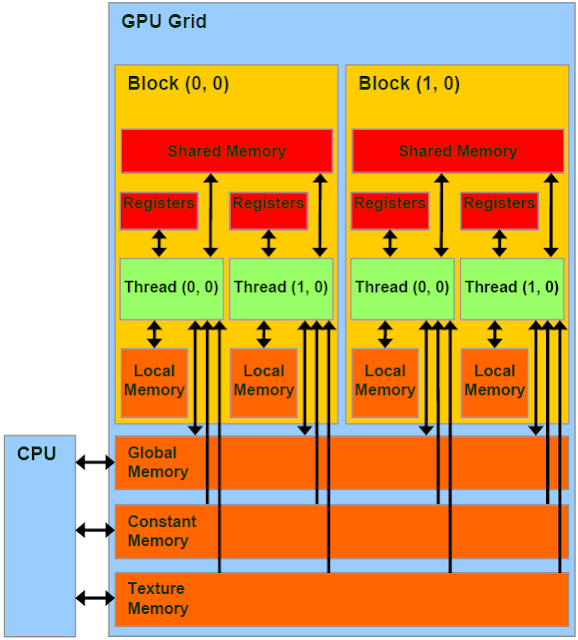

In [ ]:
#@title Multiplicación de vectores
%%cu

#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <unistd.h>


#define N 1000
#define THREADS_BLOCK 10

__global__ void vecXvec(int *A, int *B, int *C)
{
  int tid = threadIdx.x + (blockIdx.x * blockDim.x);
  
  while (tid < N)
  {
    C[tid] = A[tid] + B[tid];
    tid += blockDim.x * gridDim.x;
  }
}

int main(void)
{
  // Varibles to measure execution time
  struct timeval ts0, ts1;
  double ts;
  cudaEvent_t tc0, tc1;
  float tc;
  cudaEventCreate(&tc0);
  cudaEventCreate(&tc1);

  // Create host variables and allocate memory
  int *A, *B, *C, *res_S;
  A = (int *) malloc(N * sizeof(int));
  B = (int *) malloc(N * sizeof(int));
  C = (int *) malloc(N * sizeof(int));
  res_S = (int *) malloc(N * sizeof(int));

  // CReate device variables
  int *dev_a, *dev_b, *dev_c;

  // Stablish kernel configuration parameters
  int nb = (int) N/THREADS_BLOCK;
  dim3 nBlocks(nb); // First parameter
  dim3 tBlock(THREADS_BLOCK); // Second parameter
 
  // Fill the vectors
  for (int i = 0; i < N; i++)
  {
    A[i] = (rand() % 10) + 1;
    B[i] = (rand() % 15) + 1;
  }

  // Allocate the memory on the host
  cudaMalloc( (void**) &dev_a, N * sizeof(int) );
  cudaMalloc( (void**) &dev_b, N * sizeof(int) );
  cudaMalloc( (void**) &dev_c, N * sizeof(int) );

  // Copy arrays to GPU
  cudaMemcpy( dev_a, A, N * sizeof(int), cudaMemcpyHostToDevice );
  cudaMemcpy( dev_b, B, N * sizeof(int), cudaMemcpyHostToDevice );

  cudaEventRecord( tc0, 0 );

  // Run the kernel function
  vecXvec <<<nBlocks, tBlock>>>(dev_a, dev_b, dev_c);
 
  cudaEventRecord( tc1, 0 );
  cudaEventSynchronize( tc1 );
  cudaEventElapsedTime( &tc, tc0, tc1 );
  cudaEventDestroy( tc0 );
  cudaEventDestroy( tc1 );

  // Copy the result from device to host
  cudaMemcpy( C, dev_c, N * sizeof(int), cudaMemcpyDeviceToHost );

  gettimeofday(&ts0, 0);
  for (int i = 0; i < N; i++)
  {
    res_S[i] = A[i] + B[i];
  }
  gettimeofday(&ts1, 0);   
  ts = (ts1.tv_sec - ts0.tv_sec) + (ts1.tv_usec - ts0.tv_usec) / 1e3;

  // Print the result
  //for (int i = 0; i < N; i++)
  //{
  //  printf("\t%d * %d = %d\n", A[i], B[i], C[i]);
  //}

  printf( "\n\tCUDA Time = %1.3f ms\n"
          "\tSequential Time = %1.3f ms\n\n", tc, ts);

  cudaFree(dev_a);
  cudaFree(dev_b);
  cudaFree(dev_c);
  free(A);
  free(B);
  free(C);
 
  return 0;
}

- *cudaMalloc( (void**) &nombre_var, tamaño_var)* Crea el espacio en la memoria de la GPU, con el nombre *nombre_var* (**se deben usar apuntadores**), asignandole el tamaño *tamaño_var*. Generalmente se usa *dev_##* para nombrar a la variable, y la función *sizeof()* para asignar el tipo de dato (similar a *malloc* en C).
- Para medir el tiempo de ejecución en CUDA, se debe usar *cudaEvent_t* y *cudaEventRecord()*
- *dim3* es una estructura propia de CUDA, que permite indicar el tamaño de las 3 dimensiones de grid y bloques.
- *cudaFree()* libera la memoria de la variable que se indique.
- *tid = threadIdx.x + blockIdx.x * blockDim.x* y *tid += blockDim.x * gridDim.x* se utilizan como índices para la variable *C*. Usar las propiedades *Idx* y *Dim* de esta forma también es común openMP y MPI.

### Nota
Aunque es posible añadir más threads de los necesarios (por ejemplo, tener un proceso que se sólo repite 10 veces, pero indicar 20 threads), esto no es recomendable ya que, aunque en configuraciones pequeñas no es perceptible, hacerlo *nos cuesta tiempo*. Al final del notebook se incluyen algunos puntos sobre esto.

# Operaciones con matrices

In [ ]:
#@title Producto punto
%%cu

#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>
#include <unistd.h>

#define N 16384
#define THREADS_BLOCK 512

__global__ void dot_pr(int *a, int *b, int *r)
{
    __shared__ int temp[THREADS_BLOCK];
    int tid = threadIdx.x + (blockIdx.x * blockDim.x);
    temp[threadIdx.x] = a[tid] * b[tid];

    __syncthreads();

    if (threadIdx.x == 0)
    {
        int sum = 0;
        for (int i = 0; i < THREADS_BLOCK; i++)
        {
            sum += temp[i];
        }
        atomicAdd(r, sum);
    }
}

int main()
{
    // Varibles to measure execution time
    struct timeval ts0, ts1;
    double ts;
    cudaEvent_t tc0, tc1;
    float tc;
    cudaEventCreate(&tc0);
    cudaEventCreate(&tc1);

    // Create host variables and allocate memory
    int *a, *b, *r, res_S;
    a = (int*) malloc( N * sizeof(int) );
    b = (int*) malloc( N * sizeof(int) );
    r = (int*) malloc( sizeof(int) );

    // Create device variables
    int *dev_a, *dev_b, *dev_r;

    // Stablish kernel configuration parameters
    int nb = (int) N/THREADS_BLOCK;
    dim3 nBlocks(nb); // First parameter
    dim3 tBlock(THREADS_BLOCK); // Second parameter
    
    // Fill the vectors
    for (int i = 0; i < N; i++)
    {
        a[i] = (rand() % 10) + 1;
        b[i] = (rand() % 10) + 1; 
    }

    // Allocate the memory on the host
    cudaMalloc( (void**) &dev_a, N * sizeof(int) );
    cudaMalloc( (void**) &dev_b, N * sizeof(int) );
    cudaMalloc( (void**) &dev_r, sizeof(int) );
    
    // Copy arrays to the host
    cudaMemcpy( dev_a, a, N * sizeof(int), cudaMemcpyHostToDevice );
    cudaMemcpy( dev_b, b, N * sizeof(int), cudaMemcpyHostToDevice );
    
    cudaEventRecord( tc0, 0 );
 
    // Run the kernel function
    dot_pr<<< nBlocks, tBlock >>> (dev_a, dev_b, dev_r);
 
    cudaEventRecord( tc1, 0 );
    cudaEventSynchronize( tc1 );
    cudaEventElapsedTime( &tc, tc0, tc1 );
    cudaEventDestroy( tc0 );
    cudaEventDestroy( tc1 );
    
    // Copy the result from device to host
    cudaMemcpy( r, dev_r, sizeof(int), cudaMemcpyDeviceToHost );

    gettimeofday(&ts0, 0);
    res_S = 0;
    for (int i = 0; i < N; i++)
    {
        res_S += a[i] * b[i];
    }
    gettimeofday(&ts1, 0);   
    ts = (ts1.tv_sec - ts0.tv_sec) + (ts1.tv_usec - ts0.tv_usec) / 1e3;

    printf( "\n\tCUDA Time = %1.3f ms\n"
            "\tSequential Time = %1.3f ms\n\n", tc, ts);
    
    printf( "\t\t  CUDA \t      Sequential\n"
            "\tResult = %d \t%d\n", *r, res_S);

    cudaFree(dev_a);
    cudaFree(dev_b);
    cudaFree(dev_r);
    free(a);
    free(b);
    free(r);

    return 0;
 }


	CUDA Time = 0.015 ms
	Sequential Time = 0.042 ms

		  CUDA 	      Sequential
	Result = 492009 	492009



- *\_\_shared__* permite que todos los threads puedan accesar a la(s) variables(s). Se debe tener cuidado al usar este tipo de variables y los índices, ya que sin darnos cuenta, podemos modificar erróneamente la información. Se puede consultar más información [aquí](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#variable-memory-space-specifiers)
- *__syncthreads()* espera a que todos los threads terminen el proceso actual. Es importante usarlo cuando se llena una variable que se usará en procesos posteriores dentro del kernel. Esto previene problemas como la *race condition*.
- *atomic* son funciones catalogadas como *lectura-modificación-escritura*. Básicamente toma el valor de la dirección de memoria,debe ser global o compartida, realiza una operación (en el ejemplo, suma) y escribe el resultado en la misma dirección. El resto de funciones atómicas se pueden consultar [en este enlace](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#arithmetic-functions).
Las funciones siguen la misma sintáxis
 *atomicOPERACION(address, var)*, *address* es la dirección de memoria de la que se toma el valor inicial, y se reescribe el resultado, *var* es la variable con la que se realiza la operación.


### *Race condition*
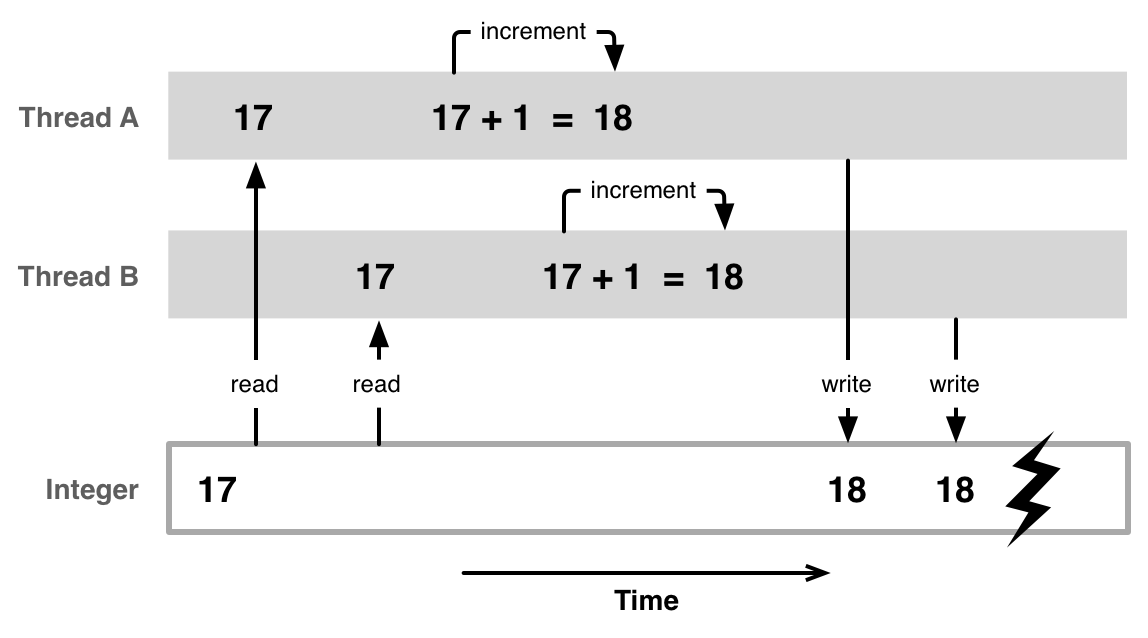

In [ ]:
#@title Multiplicación de matrices
%%cu

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <sys/time.h>
#include <unistd.h>

#define ROW 10
#define COL 10
#define SHV 10
#define N 10

__global__ void mat2mat(double *dev_a, double *dev_b, double *dev_r) 
{
    __shared__ double row_a[ROW][SHV];
    __shared__ double col_b[SHV][COL];
    
    int row = threadIdx.x + (blockIdx.x * blockDim.x);
    int col = threadIdx.y + (blockIdx.y * blockDim.y);
    double res_tmp = 0.0;
    int idx, idy;

    idx = threadIdx.y + (threadIdx.x * SHV);
    idy = threadIdx.x + (threadIdx.y * COL);

    if (idx < ROW * SHV && threadIdx.y < SHV)
    {
        row_a[threadIdx.x][threadIdx.y] = dev_a[idx];
    }
    if (idy < SHV * COL && threadIdx.y < SHV)
    {
        col_b[threadIdx.y][threadIdx.x] = dev_b[idy];
    }
    __syncthreads();

    for (int k = 0; k < SHV; k++)
    {
        res_tmp += row_a[threadIdx.y][k] * col_b[k][threadIdx.x];
    }
    __syncthreads();

    if (row < ROW && col < COL)
    {
        dev_r[col + SHV * row] = res_tmp;    
    }
}


int main(int argc, char const *argv[])
{
    // Varibles to measure execution time
    cudaEvent_t tc0, tc1;
    float tc;
    cudaEventCreate(&tc0);
    cudaEventCreate(&tc1);

    // Create host variables and allocate memory    
    // The three matrices are converted to 1D arrays
    double *MA, *MB, *MR;
    MA = (double*) malloc(ROW * SHV * sizeof(double));
    MB = (double*) malloc(SHV * COL * sizeof(double));
    MR = (double*) malloc(ROW * COL * sizeof(double));

    // Create device variables
    double *dev_a, *dev_b, *dev_r;

    // Stablish GPU parameters
    dim3 nBlocks(1, 1);
    dim3 threadsPerBlock(N, N);
    
    for (int i = 0; i < ROW * SHV; i++)
    {
        MA[i] = 1*i;
    }
    for (int i = 0; i < SHV * COL; i++)
    {
        MB[i] = 2*i;
    }
    
    // Allocate the memory on the host
    cudaMalloc( (void**) &dev_a, ROW * SHV * sizeof(double) );
    cudaMalloc( (void**) &dev_b, SHV * COL * sizeof(double) );
    cudaMalloc( (void**) &dev_r, ROW * COL * sizeof(double) );

    // Copy arrays to the host
    cudaMemcpy( dev_a, MA, ROW * SHV * sizeof(double), cudaMemcpyHostToDevice );
    cudaMemcpy( dev_b, MB, SHV * COL * sizeof(double), cudaMemcpyHostToDevice );
    
    cudaEventRecord( tc0, 0 );

    // Run the kernel function
    mat2mat<<<nBlocks, threadsPerBlock>>> (dev_a, dev_b, dev_r);
    
    cudaEventRecord( tc1, 0 );
    cudaEventSynchronize( tc1 );
    cudaEventElapsedTime( &tc, tc0, tc1 );
    cudaEventDestroy( tc0 );
    cudaEventDestroy( tc1 );

    // Copy the result from device to host
    cudaMemcpy( MR, dev_r, ROW * COL * sizeof(double), cudaMemcpyDeviceToHost );
    
    // Print the result
    /*
    printf("\n\n");
    for (int i = 0; i < ROW; i++)
    {
        for (int k = 0; k < SHV; k++)
        {
            printf("\t%2.0f", MA[k+i*SHV]);
        }
        printf("\n");
    }
    printf("\n");
    for (int i = 0; i < SHV; i++)
    {
        for (int k = 0; k < COL; k++)
        {
            printf("\t%2.0f", MB[k+i*COL]);
        }
        printf("\n");
    }
    */
    printf("\n");
    for (int i = 0; i < ROW; i++)
    {
        for (int k = 0; k < COL; k++)
        {
            printf("\t%2.0f", MR[i+COL*k]);
        }
        printf("\n");
    }

    printf( "\n\tCUDA Time = %1.3f ms\n", tc);

    cudaFree(dev_a);
    cudaFree(dev_b);
    cudaFree(dev_r);
    free(MA);
    free(MB);
    free(MR);
    return 0;
}


	5700	5790	5880	5970	6060	6150	6240	6330	6420	6510
	14700	14990	15280	15570	15860	16150	16440	16730	17020	17310
	23700	24190	24680	25170	25660	26150	26640	27130	27620	28110
	32700	33390	34080	34770	35460	36150	36840	37530	38220	38910
	41700	42590	43480	44370	45260	46150	47040	47930	48820	49710
	50700	51790	52880	53970	55060	56150	57240	58330	59420	60510
	59700	60990	62280	63570	64860	66150	67440	68730	70020	71310
	68700	70190	71680	73170	74660	76150	77640	79130	80620	82110
	77700	79390	81080	82770	84460	86150	87840	89530	91220	92910
	86700	88590	90480	92370	94260	96150	98040	99930	101820	103710

	CUDA Time = 0.027 ms



Una forma sencilla de trabajar con matrices es convertirlas a arreglos 1D y usar los índices de los threads, bloques y grids como indices de las matrices dentro del kernel.

# Ejemplo

In [ ]:
#@title Cálculo de distancia mínima (versión básica)
%%cu

#include <stdio.h>
#include <math.h>
#include <sys/time.h>
#include <unistd.h>

#define N 10000

__global__ void distance ( int* ivec, int* thxvec,
                  double* X,  double* Y, double* dev_res )
{
    int tid = blockIdx.x * blockDim.x + threadIdx.x;
    int it, thxt;
    
    double mind = 10000.0;
    double dist;
    
    if (tid < N)
    {
        for (int i = 0; i < N; i++)
        {
            if (tid != i)
            {
                dist = sqrt(pow((X[tid]-X[i]), 2) + pow((Y[tid]-Y[i]), 2));
                if (dist < mind)
                {
                    mind = dist;
                    thxt = tid;
                    it = i;
                }
            }
        }
        dev_res[tid] = mind;
        thxvec[tid] = thxt;
        ivec[tid] = it;
    }
   
}

int main ()
{
    // Varibles to measure execution time
    struct timeval tc0, tc1;
    double tc;

    // Create host variables and allocate memory
    double *X, *Y, *resultado;
    double min_t;
    int *i_res, *thx_res;
    int p1_t, p2_t;
    X   = (double*) malloc( N * sizeof(double) );
    Y   = (double*) malloc( N * sizeof(double) );
    resultado = (double*) malloc( N * sizeof(double) );
    i_res     = (int*) malloc( N * sizeof(int) );
    thx_res   = (int*) malloc( N * sizeof(int) );
    

    // Create device variables
    double *dev_x,  *dev_y, *dev_r;
    int *dev_i, *dev_t;

    // Stablish kernel configuration parameters
    dim3 nBlocks(100); // First parameter
    dim3 tBlock(100); // Second parameter
    
    // Fill the vectors
    for(int k = 0; k < N; k++)
    {
        X[k] = (k%2==0) ? k*1.8:(9.510+k)/3;
        Y[k] = (k%2==0) ? k*3.8:(k+k*0.3)/3;
    }
    
    gettimeofday(&tc0, 0);

    // Allocate the memory on the host
    cudaMalloc( (void**) &dev_x,  N * sizeof(double) );
    cudaMalloc( (void**) &dev_y,  N * sizeof(double) );
    cudaMalloc( (void**) &dev_r,  N * sizeof(double) );
    cudaMalloc( (void**) &dev_i,  N * sizeof(int) );
    cudaMalloc( (void**) &dev_t,  N * sizeof(int) );
    
    // Copy arrays to the host
    cudaMemcpy( dev_x, X, N * sizeof(double), cudaMemcpyHostToDevice );
    cudaMemcpy( dev_y, Y, N * sizeof(double), cudaMemcpyHostToDevice );
    
    // Run the kernel function
    distance<<<nBlocks, tBlock>>> ( dev_i, dev_t, dev_x, dev_y, dev_r );

    // Copy the result from device to host
    cudaMemcpy( resultado, dev_r, N * sizeof(double), cudaMemcpyDeviceToHost );
    cudaMemcpy( thx_res,   dev_t, N * sizeof(int), cudaMemcpyDeviceToHost );
    cudaMemcpy( i_res,     dev_i, N * sizeof(int), cudaMemcpyDeviceToHost );
    cudaDeviceSynchronize();
    
    gettimeofday(&tc1, 0);
    tc = (tc1.tv_sec - tc0.tv_sec) + (tc1.tv_usec - tc0.tv_usec) / 1e3;

    min_t = resultado[0];
    for (int i = 1; i < N; i++)
    {
        min_t = (resultado[i] < min_t) ? resultado[i]:min_t;
        p1_t = thx_res[i];
        p2_t = i_res[i];
    }

    printf( "\n\tCUDA Time = %1.3f ms\n", tc);

    
    printf( "\nThe minimum distance is: %6.2f\n"
            "Between the points\n"
            "p1(%6.2f, %6.2f) -- p2(%6.2f, %6.2f)\n\n",
            min_t, X[p1_t], Y[p1_t], X[p2_t], Y[p2_t]);
    
    cudaFree(dev_x);
    cudaFree(dev_y);
    cudaFree(dev_r);

    return 0;
}


	CUDA Time = 740.569 ms

The minimum distance is:   1.09
Between the points
p1(3336.17, 4332.90) -- p2(3335.50, 4332.03)




In [ ]:
#@title Cálculo de distancia mínima (versión avanzada)
%%cu

#include <math.h>
#include <random>
#include <cstdio>
#include <iostream>

#define nsamples 100
 
using namespace std;
 
__global__ void maxi(int* a, int* b, int n){
    int block = 256 * blockIdx.x;
    int max = 0;
 
    for (int i = block; i < min(256 + block, n); i++) {
 
        if (max < a[i]) {
            max = a[i];
        }
    }
    b[blockIdx.x] = max;
}
 
int main(){
 
    int n;
    n = 3 >> 2;
    int a[n];
 
    for (int i = 0; i < n; i++) {
        a[i] = rand() % n;
        cout << a[i] << "\t";
    }
 
    cudaEvent_t start, end;
    int *ad, *bd;
    int size = n * sizeof(int);
    cudaMalloc(&ad, size);
    cudaMemcpy(ad, a, size, cudaMemcpyHostToDevice);
    int grids = ceil(n * 1.0f / 256.0f);
    cudaMalloc(&bd, grids * sizeof(int));
 
    dim3 grid(grids, 1);
    dim3 block(1, 1);
 
    cudaEventCreate(&start);
    cudaEventCreate(&end);
    cudaEventRecord(start);
 
    while (n > 1) {
        maxi<<<grids, block >>>(ad, bd, n);
        n = ceil(n * 1.0f / 256.0f);
        cudaMemcpy(ad, bd, n * sizeof(int), cudaMemcpyDeviceToDevice);
    }
 
    cudaEventRecord(end);
    cudaEventSynchronize(end);
 
    float time = 0;
    cudaEventElapsedTime(&time, start, end);
 
    int ans[2];
    cudaMemcpy(ans, ad, 4, cudaMemcpyDeviceToHost);
 
    cout << "The maximum element is : " << ans[0] << endl;
 
    cout << "The time required : ";
    cout << time << endl;
}

The maximum element is : -1400477680
The time required : 0.002176



# Consideraciones

1. En cualquier caso de programación en paralelo (CUDA, openMP, MPI, etc), internamente se requiere de tiempo de preparación de los recursos que se van a emplear.
2. El manejo de la información necesaria genera latencia, es decir, más tiempo de ejecución.
3. En algunos casos, pasar de una solución secuencial a una paralela no es sencillo, e incluso se debe cambiar el método de solución.
4. En algunos casos, sobre todo en problemas con variables pequeñas, es posible encontrarnos con tiempos de ejecución iguales o más grandes que los de soluciones secuenciales.

Con lo anterior, es importante analizar si el problema que se quiere resolver realmente se beneficia del paralelismo (considerando los puntos anteriores). En algunos casos, el beneficio en tiempo de ejecución es mínimo considerando el tiempo y los requisitos de la programación en paralelo.

## Gracias por su atención